In [1]:
import os
import cv2
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class ImageClassifier():
    
    def __init__(self, data_path,im_size):
        self.data_path = data_path
        self.names = os.listdir(self.data_path)
        
        if '.DS_Store' in self.names:
            self.names.remove('.DS_Store')
            
        self.n_ims=0
        for name in self.names:
            self.n_ims += len(os.listdir(self.data_path+name))

        self.im_size = im_size
        self.get_data()
        self.compile_model()
    
    def get_image(self, filename):
        img = cv2.imread(filename)
        if img is None:
            return np.zeros((self.im_size, self.im_size, 3))
        else:
            img = cv2.resize(img, dsize=(self.im_size, self.im_size),interpolation=cv2.INTER_AREA)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            return img / 255
        
    def get_data(self):
        self.X = np.empty((self.n_ims, self.im_size, self.im_size, 3))
        self.y = np.empty(self.n_ims).T
        i = -1
        j = 0
        for name in self.names:
            directory = self.data_path + name
            for filename in os.listdir(directory):
                f = os.path.join(directory, filename)
                if os.path.isfile(f):
                    self.X[i, :, :, :] = self.get_image(f)
                    self.y[i] = j
                    i += 1
            j += 1
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.07)
        
    def compile_model(self):
        self.model = tf.keras.models.Sequential([
        # Convolution layers
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(self.im_size, self.im_size, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)), 
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        # Classification layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(self.names), activation='softmax')
        ])
        
        
        self.model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        
    def fit_model(self, epochs):
        self.model.fit(self.X_train, self.y_train, epochs = epochs)
        self.acc = self.model.evaluate(self.X_test,self.y_test, batch_size=100)
        self.pred = np.argmax(self.model.predict(self.X_test), axis=1)
        print('test accuracy: {}'.format(self.acc[1]))

     
    def plot_predictions(self):
        plt.figure(figsize=(15, 15))
        for i in range(49):
            plt.subplot(7,7,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.X_test[i])

            if self.y_test[i] != self.pred[i]:
                plt.title('Incorrect prediction', c='red', fontsize=15)

            else:
                plt.title(self.names[self.pred[i]],fontsize=20)

        plt.tight_layout()
        plt.show()
        

In [3]:
path = ''

Epoch 1/20


2022-06-19 16:47:38.401936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


634/634 [==============================] - 12s 19ms/step - loss: 1.2947 - accuracy: 0.4746
Epoch 2/20
634/634 [==============================] - 11s 17ms/step - loss: 0.8733 - accuracy: 0.6678
Epoch 3/20
634/634 [==============================] - 11s 17ms/step - loss: 0.7349 - accuracy: 0.7271
Epoch 4/20
634/634 [==============================] - 11s 17ms/step - loss: 0.6695 - accuracy: 0.7487
Epoch 5/20
634/634 [==============================] - 11s 18ms/step - loss: 0.6306 - accuracy: 0.7661
Epoch 6/20
634/634 [==============================] - 11s 17ms/step - loss: 0.5962 - accuracy: 0.7808
Epoch 7/20
634/634 [==============================] - 11s 18ms/step - loss: 0.5693 - accuracy: 0.7885
Epoch 8/20
634/634 [==============================] - 11s 18ms/step - loss: 0.5438 - accuracy: 0.7998
Epoch 9/20
634/634 [==============================] - 11s 18ms/step - loss: 0.5261 - accuracy: 0.8095
Epoch 10/20
634/634 [==============================] - 11s 18ms/step - loss: 0.5042 - accurac

2022-06-19 16:51:22.382959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 24ms/step - loss: 0.6361 - accuracy: 0.7948


2022-06-19 16:51:22.897556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


test accuracy: 0.7947540879249573


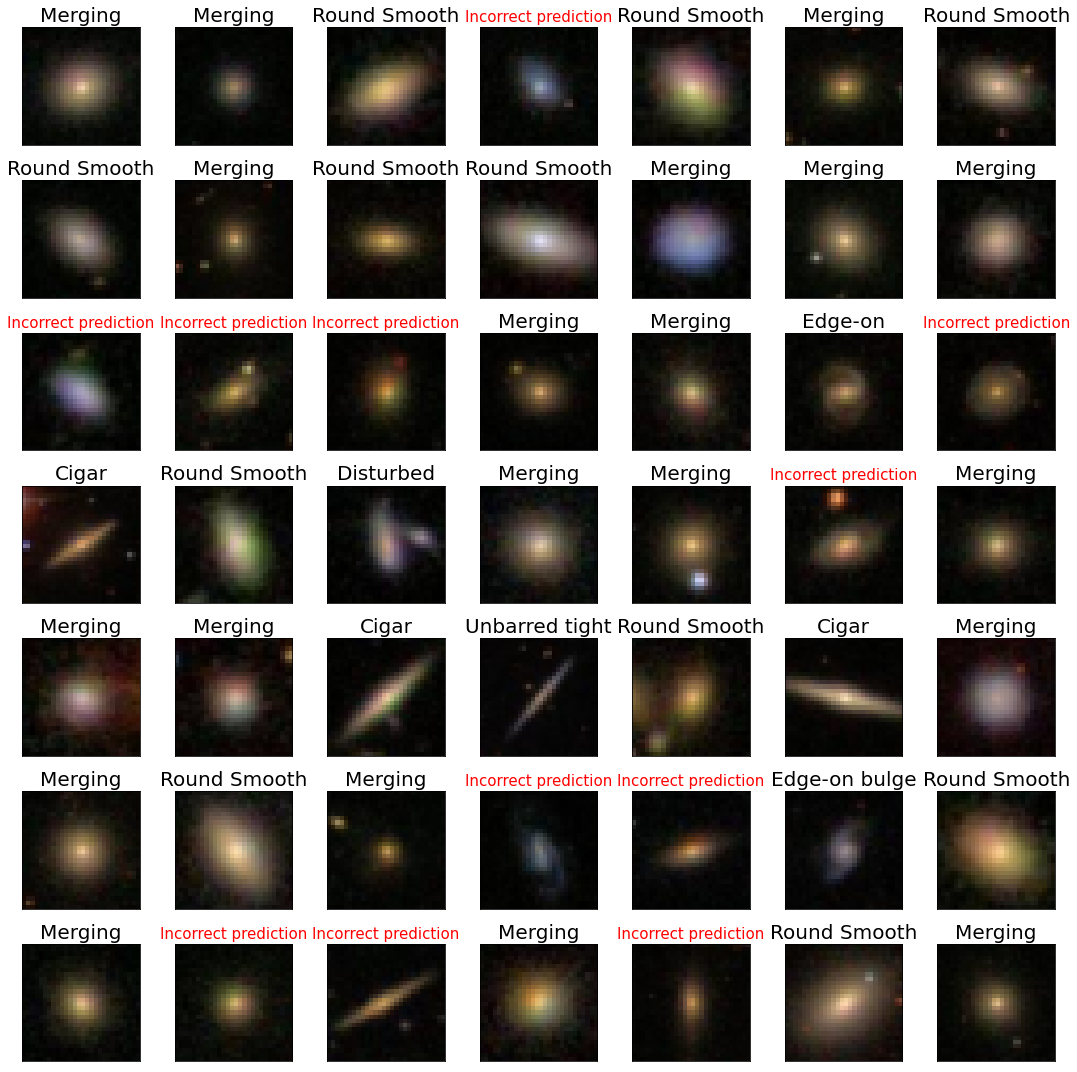

In [5]:
clf = ImageClassifier(path, im_size=28)
clf.fit_model(20)
clf.plot_predictions()